# Užadavinio aprašymas

 Apjungti JA ir AR duomenis, pateikti sprendimą, kuris leistų vizualizuoti juridinių asmenų skaičiaus pokyčio dinamiką pagal juridinio asmens buveinės apskritį, savivaldybę, teisinės formos pavadinimą, įregistravimo metus ir pateiktų atsakymą – kiek Lietuvoje yra juridinių asmenų su tam tikru parametrų rinkiniu.

 - JAR duomenys -  https://www.registrucentras.lt/p/1094
 - AR atributai https://www.registrucentras.lt/p/1192,     https://www.registrucentras.lt/p/1187

# Installs

Instaliuoju bibliotekas užduočiai atlikti

In [6]:
# pip install pandas
# pip install matplotlib
# pip install openpyxl
# pip install nbconvert
# pip install seaborn
# pip install numpy
# pip install fuzzywuzzy 
# pip install scikit-learn
# pip install jupyter_bokeh

# Imports

Importuoju reikiamas bibliotekas užduočiai atlikti

In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import os
from fuzzywuzzy import process
from sklearn.metrics import confusion_matrix
%matplotlib inline

c:\Users\ITWORK\OneDrive\Registru_centras\registru_centras\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100) 
dir_ = os.getcwd()

# JAR trumpa duomenų analizė (EDA) ir susitvarkymas

Importuojame duomenų rinkinius

In [3]:
JAR_iregistruoti = pd.read_excel(dir_ + "\JAR_IREGISTRUOTI.xlsx")
JAR_iregistruoti_desc = pd.read_excel(dir_ + "\JAR_IREGISTRUOTI_STR.xlsx", skiprows=1)

In [4]:
JAR_iregistruoti

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
...,...,...,...,...,...,...,...,...,...,...
230534,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230535,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230536,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230537,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01


JAR_iregistruoti_desc rinkinys reikalinga tik trumpam, kad susipažinti su pagrindiniu duomenų rinkiniu

In [5]:
JAR_iregistruoti_desc

,Žymėjimas,Tipas,Atributo aprašymas
0,JA_kodas,number,juridinio asmens kodas Juridinių asmenų registre
1,JA_pavadinimas,string,juridinio asmens pavadinimas Juridinių asmenų registre
2,adresas,string,"juridinio asmens adresas, nurodytas Juridinių asmenų registro įraše"
3,reg_data,string,juridinio asmens įregistravimo Juridinių asmenų registre data
4,form_kodas,number,juridinio asmens formos kodas
5,form_pavadinimas,string,juridinio asmens formos pavadinimas
6,status_kodas,number,juridinio asmens statuso kodas
7,stat_pavadinimas,string,juridinio asmens statuso pavadinimas
8,stat_data_nuo,string,juridinio asmens statuso įregistravimo data
9,formavimo_data,date,Duomenų formavimo data


## Stulpeliai su NaN reikšmėmis

Pažiūrime, kokie stulpeliai turi NaN reikšmes JAR duomenų rinkinyje. Pažiūrime, kokios tai eilutės

In [6]:
JAR_iregistruoti.isnull().sum()

ja_kodas            0
ja_pavadinimas      0
adresas             1
ja_reg_data         0
form_kodas          0
form_pavadinimas    0
stat_kodas          0
stat_pavadinimas    0
stat_data_nuo       0
formavimo_data      0
dtype: int64

In [7]:
JAR_iregistruoti[JAR_iregistruoti["adresas"].isnull()]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
60002,274290470,"Uždaroji akcinė bendrovė ""Vinkšna""",NaN,1992-06-04,310,Uždaroji akcinė bendrovė,9,Inicijuojamas likvidavimas,2024-01-24,2024-09-01


Matome, kad tik viena NaN reikšmė duomenu rinkinyje adresų stulpelyje. Galime šią eilute tiek palikti, tiek pašalinti. Aš pasirenku pašalinti, kad duomenų rinkinys būtų visiškai tvarkingas ir ateityje nesukčiau sau dėl to galvos :)

In [8]:
JAR_iregistruoti = JAR_iregistruoti[~JAR_iregistruoti["adresas"].isnull()]
JAR_iregistruoti

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01
...,...,...,...,...,...,...,...,...,...,...
230534,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230535,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230536,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01
230537,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01


In [9]:
JAR_iregistruoti[JAR_iregistruoti["adresas"].isnull()]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data


## JAR duomenų rinkinio duomenų tipai

Pažiūrime, kokie gi duomenų tipai sudaro šią lentelę

In [10]:
JAR_iregistruoti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230538 entries, 0 to 230538
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ja_kodas          230538 non-null  int64 
 1   ja_pavadinimas    230538 non-null  object
 2   adresas           230538 non-null  object
 3   ja_reg_data       230538 non-null  object
 4   form_kodas        230538 non-null  int64 
 5   form_pavadinimas  230538 non-null  object
 6   stat_kodas        230538 non-null  int64 
 7   stat_pavadinimas  230538 non-null  object
 8   stat_data_nuo     230538 non-null  object
 9   formavimo_data    230538 non-null  object
dtypes: int64(3), object(7)
memory usage: 19.3+ MB


Hmm, ten kur data, neturi būti "object", o turi būti "datetime".

In [11]:
JAR_iregistruoti['ja_reg_data'] = pd.to_datetime(JAR_iregistruoti['ja_reg_data'])
JAR_iregistruoti['stat_data_nuo'] = pd.to_datetime(JAR_iregistruoti['stat_data_nuo'])
JAR_iregistruoti['formavimo_data'] = pd.to_datetime(JAR_iregistruoti['formavimo_data'])

In [12]:
JAR_iregistruoti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230538 entries, 0 to 230538
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ja_kodas          230538 non-null  int64         
 1   ja_pavadinimas    230538 non-null  object        
 2   adresas           230538 non-null  object        
 3   ja_reg_data       230538 non-null  datetime64[ns]
 4   form_kodas        230538 non-null  int64         
 5   form_pavadinimas  230538 non-null  object        
 6   stat_kodas        230538 non-null  int64         
 7   stat_pavadinimas  230538 non-null  object        
 8   stat_data_nuo     230538 non-null  datetime64[ns]
 9   formavimo_data    230538 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 19.3+ MB


## Trumpas EDA

Paanalizuokime stulpelius, pažiūrėkime jų dažniausiai pasikartojančias reikšmes ir pan

In [13]:
JAR_iregistruoti.describe(include="all")

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
count,2.305380e+05,230538,230538,230538,230538.000000,230538,230538.000000,230538,230538,230538
unique,NaN,201861,137370,NaN,NaN,52,NaN,16,NaN,NaN
top,NaN,Individuali įmonė,"Vilnius, V. Nagevičiaus g. 3, LT-08237",NaN,NaN,Uždaroji akcinė bendrovė,NaN,Teisinis stat neįregistruotas,NaN,NaN
freq,NaN,26914,3299,NaN,NaN,104319,NaN,202634,NaN,NaN
mean,2.661720e+08,NaN,NaN,2011-10-27 12:37:33.900007936,566.062771,NaN,1.051202,NaN,2014-04-27 19:47:39.818338304,2024-09-01 00:00:00
min,1.100014e+08,NaN,NaN,1980-01-25 00:00:00,110.000000,NaN,0.000000,NaN,1980-01-25 00:00:00,2024-09-01 00:00:00
25%,2.353970e+08,NaN,NaN,2003-02-19 00:00:00,310.000000,NaN,0.000000,NaN,2008-05-09 00:00:00,2024-09-01 00:00:00
50%,3.033185e+08,NaN,NaN,2014-05-28 00:00:00,311.000000,NaN,0.000000,NaN,2017-02-08 00:00:00,2024-09-01 00:00:00
75%,3.056541e+08,NaN,NaN,2020-11-10 00:00:00,810.000000,NaN,0.000000,NaN,2022-04-05 00:00:00,2024-09-01 00:00:00
max,3.069823e+08,NaN,NaN,2024-08-30 00:00:00,975.000000,NaN,28.000000,NaN,2024-08-30 00:00:00,2024-09-01 00:00:00


ja_kodas stulpelyje pažiūrime ar tikrai visi kodai yra unikalūs. Atsakymas yra taip, visi kodai unikalūs, nėra besidubliuojančių įmonių

In [14]:
JAR_iregistruoti["ja_kodas"].nunique()

230538

Iš ja_pavadinimas stulpelio matome, kad dažniausiai pasikartojanti reikšmė yra Individuali įmonė, kuri atsikartoja 26914 kartų. Hmm, net nepagalvojau, kad yra tokių įmonių, kurios tiesiog pasivadino "Individuali įmonė" :)

In [15]:
JAR_iregistruoti["ja_pavadinimas"].value_counts()

ja_pavadinimas
Individuali įmonė                                              26914
Individualios įmonės filialas                                    323
Komanditinė ūkinė bendrija                                       173
Tikroji ūkinė bendrija                                           102
Garažų statybos ir eksploatavimo bendrija "Vairas"                22
                                                               ...  
UAB "RASO"                                                         1
Uždaroji akcinė bendrovė "TARPTAUTINĖ STATYBOS KORPORACIJA"        1
UŽDAROJI AKCINĖ BENDROVĖ "TRANSLITAS"                              1
UAB "TECHNINIAI VERTIMAI"                                          1
Uždaroji akcinė bendrovė "KOMPONENTAS"                             1
Name: count, Length: 201861, dtype: int64

In [16]:
JAR_iregistruoti["form_kodas"].nunique()

52

Iš ja_reg_data stulpelio matome, kad pirmasis įrašas buvo atliktas 1980-01-25 dieną. Hmm, įdomu kokia tai įmonė? Oh, tai sodininkų bendrija :)

In [17]:
JAR_iregistruoti[JAR_iregistruoti["ja_reg_data"] == "1980-01-25 00:00:00"]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data
53346,191743228,"Sodininkų bendrija ""Gilušis""","Trakų r. sav., Trakų sen., Gratiškių k.",1980-01-25,260,Sodininkų bendrija,0,Teisinis stat neįregistruotas,1980-01-25,2024-09-01


Iš form_pavadinimas stulpelio matome, kad yra unikalios 52 JA formos. Dažniausiai pasikartojanti reikšmė yra UAB, ko galbūt ir galima būta tikėtis.

In [18]:
JAR_iregistruoti["form_pavadinimas"].value_counts()

form_pavadinimas
Uždaroji akcinė bendrovė                    104319
Mažoji bendrija                              52735
Individuali įmonė                            26914
Asociacija                                   13591
Viešoji įstaiga                              10182
Bendrija                                      9166
Biudžetinė įstaiga                            2643
Labdaros ir paramos fondas                    1506
Profesinė sąjunga                             1440
Sodininkų bendrija                            1360
Tradicinė religinė bendruomenė                1131
Užsienio  juridinio asmens atstovybė           837
Užsienio juridinio asmens filialas             720
Biudžetinės įstaigos filialas                  663
Žemės ūkio bendrovė                            533
Kooperatinė bendrovė                           447
UAB filialas                                   419
Individualios įmonės filialas                  323
Akcinė bendrovė                                257
Asociacijos fi

Paskutinis stulpelis, kurį visai įdomu būtų pažiūrėti yra stat_pavadinimas. Matome, kad yra 16 unikalių reikšmių, kuri dažniausiai pasikartojanti yra "Teisinis stat neįregistruotas". Kaip suprantu tai įmonės, kurios nebankrutuoja, nėra pertvarkomos ar kt.

In [19]:
JAR_iregistruoti["stat_pavadinimas"].value_counts()

stat_pavadinimas
Teisinis stat neįregistruotas     202634
Inicijuojamas likvidavimas         14377
Likviduojamas                      11060
Likviduojamas dėl bankroto          1155
Bankrutuojantis                      624
Pertvarkomas                         286
Reorganizuojamas                     131
Bankrutavęs                          100
Dalyvaujantis reorganizavime          68
Restruktūrizuojamas                   62
Dalyvaujantis atskyrime               36
JA jung peržengiant 1 valst            1
Jungiama peržengiant 1 valstyb         1
JA dal 1 valst ribas jung              1
Inic. EB jungimosi būdu                1
Dalyvaujanti 1 valst jungimesi         1
Name: count, dtype: int64

# Adresų trumpa duomenų analizė (EDA) ir susitvarkymas

Adresų rinkinys bus reikalingas apjungimui su JAR_iregistruo duomenų rinkiniu tam, kad gauti aob_kodą, kuris reikalingas prisijungiant kitas lenteles.

In [42]:
JAR_adresai = pd.read_excel(dir_ + "\JAR_ADRESAI.xlsx")
JAR_adresai_desc = pd.read_excel(dir_ + "\JAR_ADRESAI_str.xlsx", skiprows=1)

In [43]:
JAR_adresai

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
0,110001436,"Vilnius, Kirtimų g. 57B, LT-02244",159092914.0,2000-05-23,2024-09-01
1,110003978,"Vilnius, S. Stanevičiaus g. 95, LT-07114",158874517.0,2006-12-28,2024-09-01
2,110004884,"Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",186085684.0,2014-12-04,2024-09-01
3,110005648,"Vilnius, Trakų g. 8-5, LT-01132",162054383.0,2006-03-21,2024-09-01
4,110006892,"Vilnius, Laisvės pr. 85A, LT-06123",187351422.0,2015-05-21,2024-09-01
...,...,...,...,...,...
230534,306982031,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",189089194.0,2024-08-30,2024-09-01
230535,306982049,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",158422769.0,2024-08-30,2024-09-01
230536,306982056,"Vilnius, Mindaugo g. 23A, LT-03231",159952081.0,2024-08-30,2024-09-01
230537,306982330,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031.0,2024-08-30,2024-09-01


JAR_adresai_desc rinkinys reikalinga tik trumpam, kad susipažinti su pagrindiniu duomenų rinkiniu

In [44]:
JAR_adresai_desc

,Žymėjimas,Tipas,Atributo aprašymas
0,JA_kodas,number,juridinio asmens kodas Juridinių asmenų registre
1,adresas,string,juridinio asmens adresas (buveinė)
2,aob_kodas,number,adreso kodas iš Adresų registro
3,adresas_nuo,string,juridinio asmens adreso įrašymo į Juridinių asmenų registro įrašą data
4,formavimo_data,date,Duomenų formavimo data


## Stulpeliai su NaN reikšmėmis

Pažiūrime, kokie stulpeliai turi NaN reikšmes JAR_adresai duomenų rinkinyje. Pažiūrime, kokios tai eilutės

In [45]:
JAR_adresai.isnull().sum()

ja_kodas              0
adresas               1
aob_kodas         11878
adresas_nuo           0
formavimo_data        0
dtype: int64

Matome, kad keliose stulpeliuose figuruoja NaN reikšmės. aob kodas stulpelyje šių reikšmių labai daug. Po kol kas su šiuo stulpeliu nedarome nieko, nes reikia padaryti EDA. Iš adreso stuleplio galime pašalinti tą vieną eilutę. Ji sutampa su ta eilute, kuri buvo JAR duomenų sete.

In [46]:
JAR_adresai[JAR_adresai["adresas"].isnull()]

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
60002,274290470,NaN,NaN,1992-06-04,2024-09-01


In [47]:
JAR_adresai[JAR_adresai["aob_kodas"].isnull()]

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
28,110049769,Vilniaus miesto savivaldybės teritorija,NaN,2024-04-25,2024-09-01
45,110060655,"Vilnius, Kairėnų g. 48",NaN,1997-07-18,2024-09-01
51,110064529,"Vilnius, A. Jakšto g. 9-305",NaN,2004-11-23,2024-09-01
67,110069451,"Vilnius, Algirdo g. 31-401, LT-03219",NaN,2024-08-14,2024-09-01
99,110087474,"Ignalinos r. sav., Rimšės sen., Drūkšinių k.",NaN,2002-10-21,2024-09-01
...,...,...,...,...,...
229575,306967093,"Klaipėda, Klemiškės g. 40D, LT-91279",NaN,2024-08-06,2024-09-01
229684,306968327,"Kaunas, Siūlų g. 5-2, LT-45196",NaN,2024-08-08,2024-09-01
229843,306970125,"Kaunas, R. Kalantos g. 19, LT-52302",NaN,2024-08-13,2024-09-01
230357,306978862,"Utenos r. sav., Daugailių sen., Ruklių k., Paežerės g. 32C, LT-28404",NaN,2024-08-27,2024-09-01


In [48]:
JAR_adresai = JAR_adresai[~JAR_adresai["adresas"].isnull()]
JAR_adresai

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
0,110001436,"Vilnius, Kirtimų g. 57B, LT-02244",159092914.0,2000-05-23,2024-09-01
1,110003978,"Vilnius, S. Stanevičiaus g. 95, LT-07114",158874517.0,2006-12-28,2024-09-01
2,110004884,"Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",186085684.0,2014-12-04,2024-09-01
3,110005648,"Vilnius, Trakų g. 8-5, LT-01132",162054383.0,2006-03-21,2024-09-01
4,110006892,"Vilnius, Laisvės pr. 85A, LT-06123",187351422.0,2015-05-21,2024-09-01
...,...,...,...,...,...
230534,306982031,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",189089194.0,2024-08-30,2024-09-01
230535,306982049,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",158422769.0,2024-08-30,2024-09-01
230536,306982056,"Vilnius, Mindaugo g. 23A, LT-03231",159952081.0,2024-08-30,2024-09-01
230537,306982330,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031.0,2024-08-30,2024-09-01


In [49]:
JAR_adresai.isnull().sum()

ja_kodas              0
adresas               0
aob_kodas         11877
adresas_nuo           0
formavimo_data        0
dtype: int64

## Adresų duomenų rinkinio duomenų tipai

Pažiūrime, kokie gi duomenų tipai sudaro šią lentelę

In [50]:
JAR_adresai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230538 entries, 0 to 230538
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ja_kodas        230538 non-null  int64  
 1   adresas         230538 non-null  object 
 2   aob_kodas       218661 non-null  float64
 3   adresas_nuo     230538 non-null  object 
 4   formavimo_data  230538 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


Hmm, ten kur data, neturi būti "object", o turi būti "datetime". Taip pat aob_kodas padarome į sveiką skaičių (int)

In [51]:
JAR_adresai['adresas_nuo'] = pd.to_datetime(JAR_adresai['adresas_nuo'])
JAR_adresai['formavimo_data'] = pd.to_datetime(JAR_adresai['formavimo_data'])
JAR_adresai['aob_kodas'] = JAR_adresai['aob_kodas'].astype("Int64")

In [52]:
JAR_adresai.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230538 entries, 0 to 230538
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ja_kodas        230538 non-null  int64         
 1   adresas         230538 non-null  object        
 2   aob_kodas       218661 non-null  Int64         
 3   adresas_nuo     230538 non-null  datetime64[ns]
 4   formavimo_data  230538 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](2), int64(1), object(1)
memory usage: 10.8+ MB


## Trumpas EDA

Paanalizuokime stulpelius, pažiūrėkime jų dažniausiai pasikartojančias reikšmes ir pan

In [53]:
JAR_adresai.describe(include = "all")

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
count,2.305380e+05,230538,218661.0,230538,230538
unique,NaN,137370,<NA>,NaN,NaN
top,NaN,"Vilnius, V. Nagevičiaus g. 3, LT-08237",<NA>,NaN,NaN
freq,NaN,3299,<NA>,NaN,NaN
mean,2.661720e+08,NaN,168187247.446348,2014-09-09 23:38:19.903703808,2024-09-01 00:00:00
min,1.100014e+08,NaN,155218288.0,1980-01-25 00:00:00,2024-09-01 00:00:00
25%,2.353970e+08,NaN,158327796.0,2009-03-16 00:00:00,2024-09-01 00:00:00
50%,3.033185e+08,NaN,164238556.0,2018-01-26 00:00:00,2024-09-01 00:00:00
75%,3.056541e+08,NaN,176107873.0,2022-01-27 00:00:00,2024-09-01 00:00:00
max,3.069823e+08,NaN,194667679.0,2024-08-30 00:00:00,2024-09-01 00:00:00


ja_kodas stulpelyje pažiūrime ar tikrai visi kodai yra unikalūs. Atsakymas yra taip, visi kodai unikalūs, nėra besidubliuojančių įmonių

In [54]:
JAR_adresai["ja_kodas"].nunique()

230538

Iš adresų stulpelio matome, kad daugiausiai pasikartojanti reikšmė yra Vilnius, V. Nagevičiaus g. 3, LT-08237. Įdomu ir tai, kad tam pačiam adresui yra priskiriamas ir tas pats aob_kodas

In [55]:
JAR_adresai["adresas"].value_counts()

adresas
Vilnius, V. Nagevičiaus g. 3, LT-08237      3299
Vilnius, Perkūnkiemio g. 13-91, LT-12114    1741
Kaunas, Partizanų g. 61-806, LT-49282       1455
Vilniaus miesto savivaldybės teritorija     1311
Vilnius, J. Savickio g. 4-7, LT-01108       1206
                                            ... 
Vilnius, Lietaus g. 9-4, LT-04125              1
Vilnius, Gražinos g. 23-1, LT-10220            1
Marijampolė, Gedimino g. 7-9, LT-68307         1
Vilnius, Liepkalnio g. 154A, LT-02121          1
Kaunas, Panerių g. 1, LT-48337                 1
Name: count, Length: 137370, dtype: int64

In [56]:
JAR_adresai[JAR_adresai["adresas"] == "Vilnius, V. Nagevičiaus g. 3, LT-08237"]

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
1437,111528726,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2023-03-30,2024-09-01
1887,111784693,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2022-05-19,2024-09-01
1932,111804128,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2020-04-16,2024-09-01
2585,120343744,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2019-05-08,2024-09-01
4283,122044178,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2021-06-25,2024-09-01
...,...,...,...,...,...
230463,306981004,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2024-08-29,2024-09-01
230505,306981495,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2024-08-30,2024-09-01
230508,306981520,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2024-08-30,2024-09-01
230515,306981634,"Vilnius, V. Nagevičiaus g. 3, LT-08237",159041031,2024-08-30,2024-09-01


In [57]:
JAR_adresai[JAR_adresai["adresas"] == "Vilnius, V. Nagevičiaus g. 3, LT-08237"]["aob_kodas"].value_counts()

aob_kodas
159041031    3299
Name: count, dtype: Int64

In [58]:
JAR_adresai[JAR_adresai["adresas"] == "Kaunas, Partizanų g. 61-806, LT-49282"]["aob_kodas"].value_counts()

aob_kodas
166767766    1455
Name: count, dtype: Int64

In [59]:
JAR_adresai[JAR_adresai["adresas"] == "Vilnius, Perkūnkiemio g. 13-91, LT-12114"]["aob_kodas"].value_counts()

aob_kodas
183833262    1741
Name: count, dtype: Int64

Toliau reikia plačiau sužinoti apie NaN reikšmes. Pasirodo, kad turime tik 6214 unikalių adresų, kurie neturi aob kodo. Po kol kas su šiais NaN nieko nedarome. Paliekame kaip yra

In [60]:
JAR_adresai[JAR_adresai["aob_kodas"].isnull()]

,ja_kodas,adresas,aob_kodas,adresas_nuo,formavimo_data
28,110049769,Vilniaus miesto savivaldybės teritorija,<NA>,2024-04-25,2024-09-01
45,110060655,"Vilnius, Kairėnų g. 48",<NA>,1997-07-18,2024-09-01
51,110064529,"Vilnius, A. Jakšto g. 9-305",<NA>,2004-11-23,2024-09-01
67,110069451,"Vilnius, Algirdo g. 31-401, LT-03219",<NA>,2024-08-14,2024-09-01
99,110087474,"Ignalinos r. sav., Rimšės sen., Drūkšinių k.",<NA>,2002-10-21,2024-09-01
...,...,...,...,...,...
229575,306967093,"Klaipėda, Klemiškės g. 40D, LT-91279",<NA>,2024-08-06,2024-09-01
229684,306968327,"Kaunas, Siūlų g. 5-2, LT-45196",<NA>,2024-08-08,2024-09-01
229843,306970125,"Kaunas, R. Kalantos g. 19, LT-52302",<NA>,2024-08-13,2024-09-01
230357,306978862,"Utenos r. sav., Daugailių sen., Ruklių k., Paežerės g. 32C, LT-28404",<NA>,2024-08-27,2024-09-01


In [61]:
JAR_adresai[JAR_adresai["aob_kodas"].isnull()]["adresas"].value_counts().to_frame().reset_index()

,adresas,count
0,Vilniaus miesto savivaldybės teritorija,1311
1,Kauno miesto savivaldybės teritorija,371
2,"Vilnius, Ozo g. 10A-10, LT-08200",149
3,Klaipėdos miesto savivaldybės teritorija,124
4,Šiaulių miesto savivaldybės teritorija,70
...,...,...
6209,"Vilnius, Krokuvos g. 8A-R24, LT-09314",1
6210,"Vilnius, A. Smetonos g. 7A-5, LT-01115",1
6211,"Kaunas, Breslaujos g. 2-5, LT-44410",1
6212,"Panevėžys, J. Basanavičiaus g. 3-1B, LT-35182",1


Užmetame akį, ar nesusikerta unikalūs adresai, kurie turi ir neturi NaN aob_kodas. Atsakymas nesusikerta. Jei susikirstų, būtų galimybė susimažinti NaN eilučių kiekį.

In [62]:
no_nan = JAR_adresai[~JAR_adresai["aob_kodas"].isnull()]["adresas"].unique()
nan = JAR_adresai[JAR_adresai["aob_kodas"].isnull()]["adresas"].unique()

In [64]:
np.intersect1d(no_nan, nan)


array([], dtype=object)

## Susimažiname stulpelių skaičių

Pasiliekame tik tuos stulpelius, kurie reikalingi apjungimui su JAR_iregistruoti duomenų rinkiniu

In [65]:
JAR_adresai = JAR_adresai[["ja_kodas","aob_kodas"]]
JAR_adresai

,ja_kodas,aob_kodas
0,110001436,159092914
1,110003978,158874517
2,110004884,186085684
3,110005648,162054383
4,110006892,187351422
...,...,...
230534,306982031,189089194
230535,306982049,158422769
230536,306982056,159952081
230537,306982330,159041031


# JAR_iresgitruotu ir adresų apjungimas

Apjungiame pagal ja_kodas stulpelį, kad prie JAR duomenų rinkinio turėtume aob_kodas. Join darome left, nes NaN reikšmes dar nenorime išmesti

In [66]:
JAR_adres = JAR_iregistruoti.merge(JAR_adresai, left_on="ja_kodas", right_on="ja_kodas", how = "left")
JAR_adres

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422
...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031


In [67]:
JAR_adres.isnull().sum()

ja_kodas                0
ja_pavadinimas          0
adresas                 0
ja_reg_data             0
form_kodas              0
form_pavadinimas        0
stat_kodas              0
stat_pavadinimas        0
stat_data_nuo           0
formavimo_data          0
aob_kodas           11877
dtype: int64

In [68]:
JAR_adres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230538 entries, 0 to 230537
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ja_kodas          230538 non-null  int64         
 1   ja_pavadinimas    230538 non-null  object        
 2   adresas           230538 non-null  object        
 3   ja_reg_data       230538 non-null  datetime64[ns]
 4   form_kodas        230538 non-null  int64         
 5   form_pavadinimas  230538 non-null  object        
 6   stat_kodas        230538 non-null  int64         
 7   stat_pavadinimas  230538 non-null  object        
 8   stat_data_nuo     230538 non-null  datetime64[ns]
 9   formavimo_data    230538 non-null  datetime64[ns]
 10  aob_kodas         218661 non-null  Int64         
dtypes: Int64(1), datetime64[ns](3), int64(3), object(4)
memory usage: 19.6+ MB


# Apskritys ir savivaldybės

Inicijuojame apskričių ir savivaldybių duomenų rinkinių parsisiuntimą. Susitvarkome ir apjungiame šiuos duomenų rinkinius

In [69]:
apskritys = pd.read_excel(dir_ + "\\adr_apskritys.xlsx")
savivaldybes = pd.read_excel(dir_ + "\\adr_savivaldybes.xlsx")

In [70]:
apskritys

,ADM_KODAS,TIPAS,TIPO_SANTRUMPA,VARDAS_K,ADM_NUO
0,1,apskritis,apskr.,Alytaus,1998-06-01
1,2,apskritis,apskr.,Kauno,1998-06-01
2,3,apskritis,apskr.,Klaipėdos,1998-06-01
3,4,apskritis,apskr.,Marijampolės,1998-06-01
4,5,apskritis,apskr.,Panevėžio,1998-06-01
5,6,apskritis,apskr.,Šiaulių,1998-06-01
6,7,apskritis,apskr.,Tauragės,1998-06-01
7,8,apskritis,apskr.,Telšių,1998-06-01
8,9,apskritis,apskr.,Utenos,1998-06-01
9,10,apskritis,apskr.,Vilniaus,1998-06-01


In [71]:
apskritys = apskritys[["ADM_KODAS", "VARDAS_K"]]
apskritys

,ADM_KODAS,VARDAS_K
0,1,Alytaus
1,2,Kauno
2,3,Klaipėdos
3,4,Marijampolės
4,5,Panevėžio
5,6,Šiaulių
6,7,Tauragės
7,8,Telšių
8,9,Utenos
9,10,Vilniaus


In [72]:
apskritys.rename(columns = {"VARDAS_K" : "apskr_vardas"}, inplace=True)
apskritys

,ADM_KODAS,apskr_vardas
0,1,Alytaus
1,2,Kauno
2,3,Klaipėdos
3,4,Marijampolės
4,5,Panevėžio
5,6,Šiaulių
6,7,Tauragės
7,8,Telšių
8,9,Utenos
9,10,Vilniaus


In [73]:
savivaldybes.head()

,SAV_KODAS,TIPAS,TIPO_SANTRUMPA,VARDAS_K,ADM_KODAS,SAV_NUO
0,11,savivaldybė,sav.,Alytaus miesto,1,1998-06-01
1,12,savivaldybė,sav.,Birštono,2,1998-06-01
2,13,savivaldybė,sav.,Vilniaus miesto,10,1998-06-01
3,15,savivaldybė,sav.,Druskininkų,1,1998-06-01
4,18,savivaldybė,sav.,Marijampolės,4,1998-06-01


In [74]:
savivaldybes.rename(columns = {"VARDAS_K" : "sav_vardas"}, inplace=True)
savivaldybes.head()

,SAV_KODAS,TIPAS,TIPO_SANTRUMPA,sav_vardas,ADM_KODAS,SAV_NUO
0,11,savivaldybė,sav.,Alytaus miesto,1,1998-06-01
1,12,savivaldybė,sav.,Birštono,2,1998-06-01
2,13,savivaldybė,sav.,Vilniaus miesto,10,1998-06-01
3,15,savivaldybė,sav.,Druskininkų,1,1998-06-01
4,18,savivaldybė,sav.,Marijampolės,4,1998-06-01


In [75]:
apskr_sav = savivaldybes.merge(apskritys, on="ADM_KODAS", how = "left")
apskr_sav.head()

,SAV_KODAS,TIPAS,TIPO_SANTRUMPA,sav_vardas,ADM_KODAS,SAV_NUO,apskr_vardas
0,11,savivaldybė,sav.,Alytaus miesto,1,1998-06-01,Alytaus
1,12,savivaldybė,sav.,Birštono,2,1998-06-01,Kauno
2,13,savivaldybė,sav.,Vilniaus miesto,10,1998-06-01,Vilniaus
3,15,savivaldybė,sav.,Druskininkų,1,1998-06-01,Alytaus
4,18,savivaldybė,sav.,Marijampolės,4,1998-06-01,Marijampolės


In [76]:
apskr_sav = apskr_sav[["SAV_KODAS", "sav_vardas", "apskr_vardas"]]
apskr_sav.head()

,SAV_KODAS,sav_vardas,apskr_vardas
0,11,Alytaus miesto,Alytaus
1,12,Birštono,Kauno
2,13,Vilniaus miesto,Vilniaus
3,15,Druskininkų,Alytaus
4,18,Marijampolės,Marijampolės


In [77]:
apskr_sav.isnull().sum()

SAV_KODAS       0
sav_vardas      0
apskr_vardas    0
dtype: int64

# Statiniai

Inicijuojame pastatų duomenų rinkinio parsisiuntimą. Susitvarkome ir apjungiame su apskr_sav

In [78]:
statiniai = pd.read_csv(dir_ + "\\adr_stat_lr.csv", sep="|")
statiniai

C:\Users\ITWORK\AppData\Local\Temp\ipykernel_10440\2571108754.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  statiniai = pd.read_csv(dir_ + "\\adr_stat_lr.csv", sep="|")


,SAV_KODAS,AOB_KODAS,GYV_KODAS,GAT_KODAS,NR,KORPUSO_NR,PASTO_KODAS,AOB_NUO
0,32,155218235,21768,1198812.0,46,NaN,LT-85113,2005-02-08
1,32,155218254,21768,1198812.0,49,NaN,LT-85113,2005-02-08
2,32,155218269,21768,1198812.0,51,NaN,LT-85113,2005-02-08
3,32,155218273,21768,1198812.0,48,NaN,LT-85113,2005-02-08
4,32,155218288,21768,1198812.0,54,NaN,LT-85113,2005-02-08
...,...,...,...,...,...,...,...,...
1105231,41,194946672,26294,1609173.0,47B,NaN,NaN,2024-08-29
1105232,41,194946687,26294,1609173.0,47L,NaN,NaN,2024-08-29
1105233,55,194947334,20419,1388496.0,21,NaN,NaN,2024-08-30
1105234,55,194947865,28758,1342207.0,15,NaN,NaN,2024-08-30


In [79]:
statiniai.isnull().sum()

SAV_KODAS            0
AOB_KODAS            0
GYV_KODAS            0
GAT_KODAS        72754
NR                   0
KORPUSO_NR     1101870
PASTO_KODAS         89
AOB_NUO              0
dtype: int64

In [80]:
statiniai.nunique()

SAV_KODAS           60
AOB_KODAS      1105236
GYV_KODAS        18788
GAT_KODAS        57392
NR                3788
KORPUSO_NR         139
PASTO_KODAS      16692
AOB_NUO           4864
dtype: int64

In [81]:
statiniai = statiniai.merge(apskr_sav, on = "SAV_KODAS")
statiniai

,SAV_KODAS,AOB_KODAS,GYV_KODAS,GAT_KODAS,NR,KORPUSO_NR,PASTO_KODAS,AOB_NUO,sav_vardas,apskr_vardas
0,32,155218235,21768,1198812.0,46,NaN,LT-85113,2005-02-08,Akmenės rajono,Šiaulių
1,32,155218254,21768,1198812.0,49,NaN,LT-85113,2005-02-08,Akmenės rajono,Šiaulių
2,32,155218269,21768,1198812.0,51,NaN,LT-85113,2005-02-08,Akmenės rajono,Šiaulių
3,32,155218273,21768,1198812.0,48,NaN,LT-85113,2005-02-08,Akmenės rajono,Šiaulių
4,32,155218288,21768,1198812.0,54,NaN,LT-85113,2005-02-08,Akmenės rajono,Šiaulių
...,...,...,...,...,...,...,...,...,...,...
1105231,41,194946672,26294,1609173.0,47B,NaN,NaN,2024-08-29,Vilniaus rajono,Vilniaus
1105232,41,194946687,26294,1609173.0,47L,NaN,NaN,2024-08-29,Vilniaus rajono,Vilniaus
1105233,55,194947334,20419,1388496.0,21,NaN,NaN,2024-08-30,Klaipėdos rajono,Klaipėdos
1105234,55,194947865,28758,1342207.0,15,NaN,NaN,2024-08-30,Klaipėdos rajono,Klaipėdos


In [82]:
statiniai.isnull().sum()

SAV_KODAS             0
AOB_KODAS             0
GYV_KODAS             0
GAT_KODAS         72754
NR                    0
KORPUSO_NR      1101870
PASTO_KODAS          89
AOB_NUO               0
sav_vardas            0
apskr_vardas          0
dtype: int64

In [83]:
statiniai = statiniai[["AOB_KODAS", "sav_vardas", "apskr_vardas"]]
statiniai

,AOB_KODAS,sav_vardas,apskr_vardas
0,155218235,Akmenės rajono,Šiaulių
1,155218254,Akmenės rajono,Šiaulių
2,155218269,Akmenės rajono,Šiaulių
3,155218273,Akmenės rajono,Šiaulių
4,155218288,Akmenės rajono,Šiaulių
...,...,...,...
1105231,194946672,Vilniaus rajono,Vilniaus
1105232,194946687,Vilniaus rajono,Vilniaus
1105233,194947334,Klaipėdos rajono,Klaipėdos
1105234,194947865,Klaipėdos rajono,Klaipėdos


In [84]:
statiniai.rename(columns = {"sav_vardas" : "sav_vardas_statiniai", "apskr_vardas" : "apskr_vardas_statiniai", "AOB_KODAS":"aob_kodas"}, inplace = True)

In [85]:
statiniai.nunique()

aob_kodas                 1105236
sav_vardas_statiniai           60
apskr_vardas_statiniai         10
dtype: int64

# Patalpos

Inicijuojame patalpų duomenų rinkinio parsisiuntimą. Susitvarkome ir apjungiame su apskr_sav

In [158]:
patalpos = pd.read_csv(dir_ + "\\adr_pat_lr.csv", sep="|")
patalpos

,SAV_KODAS,PAT_KODAS,AOB_KODAS,PATALPOS_NR,PAT_NUO
0,53,160311305,159409366,2,2009-05-08
1,29,160311324,157192713,2,2009-05-08
2,71,160311339,155998575,25,2009-05-08
3,13,160311343,156794352,9,2009-05-08
4,71,160311358,156012885,25,2009-05-08
...,...,...,...,...,...
1154206,62,194947994,194935899,2,2024-08-30
1154207,62,194948015,194935903,1,2024-08-30
1154208,62,194948034,194935903,2,2024-08-30
1154209,62,194948049,194936201,1,2024-08-30


In [159]:
patalpos.isnull().sum()

SAV_KODAS      0
PAT_KODAS      0
AOB_KODAS      0
PATALPOS_NR    0
PAT_NUO        0
dtype: int64

In [160]:
patalpos = patalpos.sort_values(by = ["AOB_KODAS"])
patalpos

,SAV_KODAS,PAT_KODAS,AOB_KODAS,PATALPOS_NR,PAT_NUO
647889,32,168392852,155222841,2,2009-05-08
648275,32,168397581,155222841,8,2009-05-08
647774,32,168391416,155222841,1,2009-05-08
648340,32,168398372,155222841,6,2009-05-08
648339,32,168398368,155222841,4,2009-05-08
...,...,...,...,...,...
1154207,62,194948015,194935903,1,2024-08-30
1154198,62,194945972,194936197,2,2024-08-30
1154203,62,194947941,194936197,1,2024-08-30
1154210,62,194948053,194936201,2,2024-08-30


In [161]:
patalpos.nunique()

SAV_KODAS           60
PAT_KODAS      1154211
AOB_KODAS        69412
PATALPOS_NR       3363
PAT_NUO           3867
dtype: int64

In [162]:
patalpos = patalpos.merge(apskr_sav, on = "SAV_KODAS")
patalpos

,SAV_KODAS,PAT_KODAS,AOB_KODAS,PATALPOS_NR,PAT_NUO,sav_vardas,apskr_vardas
0,32,168392852,155222841,2,2009-05-08,Akmenės rajono,Šiaulių
1,32,168397581,155222841,8,2009-05-08,Akmenės rajono,Šiaulių
2,32,168391416,155222841,1,2009-05-08,Akmenės rajono,Šiaulių
3,32,168398372,155222841,6,2009-05-08,Akmenės rajono,Šiaulių
4,32,168398368,155222841,4,2009-05-08,Akmenės rajono,Šiaulių
...,...,...,...,...,...,...,...
1154206,62,194948015,194935903,1,2024-08-30,Molėtų rajono,Utenos
1154207,62,194945972,194936197,2,2024-08-30,Molėtų rajono,Utenos
1154208,62,194947941,194936197,1,2024-08-30,Molėtų rajono,Utenos
1154209,62,194948053,194936201,2,2024-08-30,Molėtų rajono,Utenos


In [163]:
patalpos = patalpos[["AOB_KODAS", "PAT_KODAS", "sav_vardas", "apskr_vardas"]]
patalpos

,AOB_KODAS,PAT_KODAS,sav_vardas,apskr_vardas
0,155222841,168392852,Akmenės rajono,Šiaulių
1,155222841,168397581,Akmenės rajono,Šiaulių
2,155222841,168391416,Akmenės rajono,Šiaulių
3,155222841,168398372,Akmenės rajono,Šiaulių
4,155222841,168398368,Akmenės rajono,Šiaulių
...,...,...,...,...
1154206,194935903,194948015,Molėtų rajono,Utenos
1154207,194936197,194945972,Molėtų rajono,Utenos
1154208,194936197,194947941,Molėtų rajono,Utenos
1154209,194936201,194948053,Molėtų rajono,Utenos


In [164]:
patalpos.isnull().sum()

AOB_KODAS       0
PAT_KODAS       0
sav_vardas      0
apskr_vardas    0
dtype: int64

Su patalpų duomenų rinkiniu yra toks dalykas, kad turime tiek aob_kodas stulpelį ir PAT_KODAS stulpelį. Šie abu stulpeliai gali pasitarnauti apjungiant duomenis prie JAR duomenų rinkinio. Tokiu atveju būtų paranku pasidaryti patalpos_PAT ir patalpos_AOB duomenu rinkinius, kad pasižiūrėti, pagal kurį stulpelį apjungimas būtų geresnis

In [165]:
patalpos_PAT = patalpos.copy()
patalpos_PAT.nunique()

AOB_KODAS         69412
PAT_KODAS       1154211
sav_vardas           60
apskr_vardas         10
dtype: int64

In [167]:
patalpos_PAT.drop(columns = ["AOB_KODAS"], inplace = True)

In [169]:
patalpos_PAT.rename(columns = {"sav_vardas" : "sav_vardas_patalpos_PAT", "apskr_vardas" : "apskr_vardas_patalpos_PAT"}, inplace = True)
patalpos_PAT

,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT
0,168392852,Akmenės rajono,Šiaulių
1,168397581,Akmenės rajono,Šiaulių
2,168391416,Akmenės rajono,Šiaulių
3,168398372,Akmenės rajono,Šiaulių
4,168398368,Akmenės rajono,Šiaulių
...,...,...,...
1154206,194948015,Molėtų rajono,Utenos
1154207,194945972,Molėtų rajono,Utenos
1154208,194947941,Molėtų rajono,Utenos
1154209,194948053,Molėtų rajono,Utenos


In [170]:
patalpos_AOB = patalpos.copy()
patalpos_AOB = patalpos_AOB[~patalpos_AOB["AOB_KODAS"].duplicated()]
patalpos_AOB

,AOB_KODAS,PAT_KODAS,sav_vardas,apskr_vardas
0,155222841,168392852,Akmenės rajono,Šiaulių
8,155222856,165353465,Akmenės rajono,Šiaulių
16,155222928,165419735,Akmenės rajono,Šiaulių
32,155222932,166461687,Akmenės rajono,Šiaulių
36,155222947,166460308,Akmenės rajono,Šiaulių
...,...,...,...,...
1154201,194935588,194945987,Molėtų rajono,Utenos
1154203,194935899,194947994,Molėtų rajono,Utenos
1154205,194935903,194948034,Molėtų rajono,Utenos
1154207,194936197,194945972,Molėtų rajono,Utenos


In [171]:
patalpos_AOB.drop(columns = ["PAT_KODAS"], inplace = True)

In [172]:
patalpos_AOB.rename(columns = {"sav_vardas" : "sav_vardas_patalpos_AOB", "apskr_vardas" : "apskr_vardas_patalpos_AOB", "AOB_KODAS":"aob_kodas"}, inplace = True)
patalpos_AOB

,aob_kodas,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB
0,155222841,Akmenės rajono,Šiaulių
8,155222856,Akmenės rajono,Šiaulių
16,155222928,Akmenės rajono,Šiaulių
32,155222932,Akmenės rajono,Šiaulių
36,155222947,Akmenės rajono,Šiaulių
...,...,...,...
1154201,194935588,Molėtų rajono,Utenos
1154203,194935899,Molėtų rajono,Utenos
1154205,194935903,Molėtų rajono,Utenos
1154207,194936197,Molėtų rajono,Utenos


# JAR_adres, pastatų ir patapų apjungimai

In [173]:
JAR_adres

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422
...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031


In [174]:
statiniai

,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai
0,155218235,Akmenės rajono,Šiaulių
1,155218254,Akmenės rajono,Šiaulių
2,155218269,Akmenės rajono,Šiaulių
3,155218273,Akmenės rajono,Šiaulių
4,155218288,Akmenės rajono,Šiaulių
...,...,...,...
1105231,194946672,Vilniaus rajono,Vilniaus
1105232,194946687,Vilniaus rajono,Vilniaus
1105233,194947334,Klaipėdos rajono,Klaipėdos
1105234,194947865,Klaipėdos rajono,Klaipėdos


In [175]:
patalpos_PAT

,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT
0,168392852,Akmenės rajono,Šiaulių
1,168397581,Akmenės rajono,Šiaulių
2,168391416,Akmenės rajono,Šiaulių
3,168398372,Akmenės rajono,Šiaulių
4,168398368,Akmenės rajono,Šiaulių
...,...,...,...
1154206,194948015,Molėtų rajono,Utenos
1154207,194945972,Molėtų rajono,Utenos
1154208,194947941,Molėtų rajono,Utenos
1154209,194948053,Molėtų rajono,Utenos


In [176]:
patalpos_AOB

,aob_kodas,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB
0,155222841,Akmenės rajono,Šiaulių
8,155222856,Akmenės rajono,Šiaulių
16,155222928,Akmenės rajono,Šiaulių
32,155222932,Akmenės rajono,Šiaulių
36,155222947,Akmenės rajono,Šiaulių
...,...,...,...
1154201,194935588,Molėtų rajono,Utenos
1154203,194935899,Molėtų rajono,Utenos
1154205,194935903,Molėtų rajono,Utenos
1154207,194936197,Molėtų rajono,Utenos


In [177]:
JAR_adres1 = JAR_adres.merge(statiniai, on = "aob_kodas", how = "left")
JAR_adres1

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914,Vilniaus miesto,Vilniaus
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517,Vilniaus miesto,Vilniaus
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684,Vilniaus rajono,Vilniaus
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422,Vilniaus miesto,Vilniaus
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769,Telšių rajono,Telšių
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081,Vilniaus miesto,Vilniaus
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031,Vilniaus miesto,Vilniaus


In [178]:
JAR_adres2 = JAR_adres1.merge(patalpos_AOB, left_on = "aob_kodas", right_on="aob_kodas", how = "left")
JAR_adres2

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914,Vilniaus miesto,Vilniaus,NaN,NaN
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517,Vilniaus miesto,Vilniaus,NaN,NaN
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684,Vilniaus rajono,Vilniaus,NaN,NaN
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN,NaN,NaN
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422,Vilniaus miesto,Vilniaus,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN,NaN,NaN
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769,Telšių rajono,Telšių,NaN,NaN
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus


In [179]:
JAR_adres3 = JAR_adres2.merge(patalpos_PAT, left_on = "aob_kodas", right_on="PAT_KODAS", how = "left")
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684,Vilniaus rajono,Vilniaus,NaN,NaN,NaN,NaN,NaN
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769,Telšių rajono,Telšių,NaN,NaN,NaN,NaN,NaN
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN


Matome, kad apjungiant duomenu rinkinius, gaunasi nemažai NaN reikšmių.

In [181]:
JAR_adres3.isnull().sum()

ja_kodas                          0
ja_pavadinimas                    0
adresas                           0
ja_reg_data                       0
form_kodas                        0
form_pavadinimas                  0
stat_kodas                        0
stat_pavadinimas                  0
stat_data_nuo                     0
formavimo_data                    0
aob_kodas                     11877
sav_vardas_statiniai         114953
apskr_vardas_statiniai       114953
sav_vardas_patalpos_AOB      203348
apskr_vardas_patalpos_AOB    203348
PAT_KODAS                    127462
sav_vardas_patalpos_PAT      127462
apskr_vardas_patalpos_PAT    127462
dtype: int64

Pažiūrime, ar patalpos_AOB duomenų rinkinys atneša naudos, sužinant apskritį ir savivaldybę. Atsakymas ne

In [183]:
JAR_adres3[(JAR_adres3["sav_vardas_patalpos_AOB"].notnull()) & (JAR_adres2["sav_vardas_statiniai"].isnull())]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT


Pažiūrime, ar sav_vardas_patalpos_PAT duomenų rinkinys atneša naudos, sužinant apskritį ir savivaldybę. Atsakymas TAIP.

In [184]:
JAR_adres3[(JAR_adres3["sav_vardas_patalpos_PAT"].notnull()) & (JAR_adres2["sav_vardas_statiniai"].isnull())]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus
5,110008377,"Uždaroji akcinė bendrovė ""KOMPONENTAS""","Vilnius, Kapsų g. 19-19, LT-02182",1991-04-26,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-26,2024-09-01,162241508,NaN,NaN,NaN,NaN,162241508.0,Vilniaus miesto,Vilniaus
11,110014316,"UAB ""Labek""","Vilnius, Fabijoniškių g. 3-17, LT-07130",1991-05-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-05-29,2024-09-01,165634476,NaN,NaN,NaN,NaN,165634476.0,Vilniaus miesto,Vilniaus
15,110017230,"Uždaroji akcinė bendrovė ""KARATAS-3""","Marijampolė, Gedimino g. 7-9, LT-68307",1991-06-06,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-06-06,2024-09-01,185134202,NaN,NaN,NaN,NaN,185134202.0,Marijampolės,Marijampolės
17,110019391,"Uždaroji akcinė bendrovė ""TARPTAUTINĖ STATYBOS KORPORACIJA""","Vilnius, Gražinos g. 23-1, LT-10220",1990-05-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1990-05-29,2024-09-01,166560583,NaN,NaN,NaN,NaN,166560583.0,Vilniaus miesto,Vilniaus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230527,306981940,UAB Grupė M4,"Vilnius, Leičių g. 11-128, LT-12109",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,191331806,NaN,NaN,NaN,NaN,191331806.0,Vilniaus miesto,Vilniaus
230528,306981958,Mažoji bendrija Meno respublika,"Vilnius, Viršuliškių g. 38B-53, LT-05110",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,192917501,NaN,NaN,NaN,NaN,192917501.0,Vilniaus miesto,Vilniaus
230530,306981972,"Rooftop collective, MB","Klaipėda, Mogiliovo g. 3-14, LT-95252",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,166341722,NaN,NaN,NaN,NaN,166341722.0,Klaipėdos miesto,Klaipėdos
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus


Susikuriame naujus savivaldybės ir apskričių stulpelius. Apjungiame sav_vardas_statiniai su sav_vardas_patalpos_AOB bei apskr_vardas_statiniai su apskr_vardas_patalpos_AOB

In [187]:
JAR_adres3['savivaldybes'] = JAR_adres3['sav_vardas_statiniai'].combine_first(JAR_adres3['sav_vardas_patalpos_PAT'])
JAR_adres3['apskritys'] = JAR_adres3['apskr_vardas_statiniai'].combine_first(JAR_adres3['sav_vardas_patalpos_PAT'])
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684,Vilniaus rajono,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769,Telšių rajono,Telšių,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus


Po apjungimo matome, kad savivaldybių ir apskričių pavyko prisidėti maksimalų skaičių, t.y iki tiek, kiek turėjome aob_kodas stulpelio reikšmių (be NaN). Ar teisingai padarėme, kad jungėme pagal PAT kodą - sunku pasakyti, bet rezultatą tai davė. Toliau darbas nesibaigia, ir reikia bandyti prisidėti savivaldybes ir apskritys, ten kur nėra aob_kodas stulpelio reikšmių. Kaip tai galime padaryti? Regex + fuzzywuzzy panaudojant adresų stulpelį! :)

In [189]:
JAR_adres3.isnull().sum()

ja_kodas                          0
ja_pavadinimas                    0
adresas                           0
ja_reg_data                       0
form_kodas                        0
form_pavadinimas                  0
stat_kodas                        0
stat_pavadinimas                  0
stat_data_nuo                     0
formavimo_data                    0
aob_kodas                     11877
sav_vardas_statiniai         114953
apskr_vardas_statiniai       114953
sav_vardas_patalpos_AOB      203348
apskr_vardas_patalpos_AOB    203348
PAT_KODAS                    127462
sav_vardas_patalpos_PAT      127462
apskr_vardas_patalpos_PAT    127462
savivaldybes                  11877
apskritys                     11877
dtype: int64

# Savivaldybių ir apskričių papildymas iš adresų lauko

Tam, kad išgauti miestus, miestelius ar rajonus, panaudosime regex. Regex, arba reguliarios išraiškos (angl. regular expressions), yra galingas įrankis tekstui analizuoti ir apdoroti. Jie naudojami paieškai, teksto atitikmenų radimui, teksto dalies pakeitimui arba duomenų išgavimui iš tekstų. Regex leidžia apibrėžti šablonus, kurie aprašo simbolių eilutes, leidžiant pažymėti atitinkamas vietas tekste, kurios atitinka nurodytus kriterijus.

In [190]:
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,aob_kodas,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,159092914,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,158874517,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,186085684,Vilniaus rajono,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,162054383,NaN,NaN,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,187351422,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,189089194,NaN,NaN,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,158422769,Telšių rajono,Telšių,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159952081,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,159041031,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus


In [191]:
JAR_adres3['regex'] = JAR_adres3['adresas'].str.extract(r'^([^,]+)')
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_statiniai,apskr_vardas_statiniai,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,Vilniaus rajono,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus,Vilniaus r. sav.
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Telšių rajono,Telšių,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių,Telšių r. sav.
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius


In [192]:
sav = JAR_adres3[JAR_adres3["savivaldybes"].notnull()]["savivaldybes"].unique()
sav

array(['Vilniaus miesto', 'Vilniaus rajono', 'Kauno miesto',
       'Marijampolės', 'Šiaulių miesto', 'Panevėžio miesto', 'Elektrėnų',
       'Trakų rajono', 'Utenos rajono', 'Kėdainių rajono',
       'Panevėžio rajono', 'Neringos', 'Pakruojo rajono',
       'Klaipėdos miesto', 'Druskininkų', 'Alytaus miesto',
       'Mažeikių rajono', 'Kauno rajono', 'Jonavos rajono',
       'Kaišiadorių rajono', 'Jurbarko rajono', 'Ukmergės rajono',
       'Klaipėdos rajono', 'Kretingos rajono', 'Pagėgių',
       'Radviliškio rajono', 'Visagino', 'Ignalinos rajono',
       'Šiaulių rajono', 'Plungės rajono', 'Varėnos rajono',
       'Širvintų rajono', 'Joniškio rajono', 'Zarasų rajono',
       'Šalčininkų rajono', 'Raseinių rajono', 'Palangos miesto',
       'Tauragės rajono', 'Kazlų Rūdos', 'Akmenės rajono',
       'Vilkaviškio rajono', 'Švenčionių rajono', 'Kalvarijos',
       'Šilutės rajono', 'Kelmės rajono', 'Šakių rajono', 'Telšių rajono',
       'Anykščių rajono', 'Biržų rajono', 'Kupiškio raj

In [193]:
JAR_adres3.isnull().sum()

ja_kodas                          0
ja_pavadinimas                    0
adresas                           0
ja_reg_data                       0
form_kodas                        0
form_pavadinimas                  0
stat_kodas                        0
stat_pavadinimas                  0
stat_data_nuo                     0
formavimo_data                    0
aob_kodas                     11877
sav_vardas_statiniai         114953
apskr_vardas_statiniai       114953
sav_vardas_patalpos_AOB      203348
apskr_vardas_patalpos_AOB    203348
PAT_KODAS                    127462
sav_vardas_patalpos_PAT      127462
apskr_vardas_patalpos_PAT    127462
savivaldybes                  11877
apskritys                     11877
regex                             0
dtype: int64

In [194]:
JAR_adres3["regex"].unique()

array(['Vilnius', 'Vilniaus r. sav.', 'Vilniaus m. sav.', 'Kaunas',
       'Marijampolė', 'Šiauliai', 'Panevėžys', 'Elektrėnų sav.',
       'Trakų r. sav.', 'Utena',
       'Vilniaus miesto savivaldybės teritorija', 'Kėdainių r. sav.',
       'Panevėžio r. sav.', 'Neringa', 'Trakai', 'Pakruojis', 'Klaipėda',
       'Druskininkai', 'Alytus', 'Mažeikiai', 'Kauno r. sav.', 'Jonava',
       'Kaišiadorių r. sav.', 'Jurbarkas', 'Ukmergė', 'Klaipėdos r. sav.',
       'Kretinga', 'Pagėgiai', 'Radviliškio r. sav.', 'Ignalinos r. sav.',
       'Visaginas', 'Ignalina', 'Visagino sav.', 'Šiaulių r. sav.',
       'Palanga', 'Pasvalio r. sav.', 'Plungė',
       'Klaipėdos miesto savivaldybės teritorija',
       'Neringos savivaldybės teritorija', 'Varėnos r. sav.',
       'Kauno miesto savivaldybės teritorija',
       'Kaišiadorių rajono savivaldybės teritorija', 'Širvintos',
       'Joniškis', 'Kretingos r. sav.', 'Zarasai', 'Šalčininkų r. sav.',
       'Varėna', 'Marijampolės sav.', 'Šalčininkai',

In [195]:
JAR_adres3["regex"].nunique()

168

Išgavę reikšmes, kuriuose kaip matome yra miestai, miesteliai ir kt, reikia prie kiekvienos reikšmės priskirti artimiausią savivaldybę. Tai galima atlikti tiek rankiškai, tiek automatizuotai panaudojant fuzzywuzzy biblioteką. FuzzyWuzzy padeda atlikti "fuzzy" teksto palyginimą, tai yra, leidžia nustatyti, kaip panašūs yra du tekstai. Ši biblioteka naudoja Levenshtein Distance algoritmą, kad įvertintų tekstų panašumą, skaičiuodama, kiek minimalių pakeitimų (įterpimų, ištrinimų ar pakeitimų) reikia, kad vienas tekstas taptų kitu.

In [196]:
def match_names_with_confidence(name, choices):
    match, score = process.extractOne(name, choices)
    return pd.Series([match, score])

JAR_adres3[['savivaldybes_final', 'savivaldybes_final_confidence']] = JAR_adres3['regex'].apply(match_names_with_confidence, choices=sav)

In [197]:
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus,Vilniaus r. sav.,Vilniaus rajono,73
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių,Telšių r. sav.,Telšių rajono,69
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77


In [198]:
JAR_adres3.isnull().sum()

ja_kodas                              0
ja_pavadinimas                        0
adresas                               0
ja_reg_data                           0
form_kodas                            0
form_pavadinimas                      0
stat_kodas                            0
stat_pavadinimas                      0
stat_data_nuo                         0
formavimo_data                        0
aob_kodas                         11877
sav_vardas_statiniai             114953
apskr_vardas_statiniai           114953
sav_vardas_patalpos_AOB          203348
apskr_vardas_patalpos_AOB        203348
PAT_KODAS                        127462
sav_vardas_patalpos_PAT          127462
apskr_vardas_patalpos_PAT        127462
savivaldybes                      11877
apskritys                         11877
regex                                 0
savivaldybes_final                    0
savivaldybes_final_confidence         0
dtype: int64

## EDA

Algoritmas suveikė ir turime priskirtą savivaldybę. Tačiau kaip patikrinti ar jis gerai priskyrė? reikia prisiminti, kad turime "True" savivaldybių duomenis, kai apsijungimą darėme per aob_kodas ir PAT_KODAS. Galime eliminuoti NaN ir tada pažiūrėti ar yra skirtumas tarp to ką padarė algoritmas ir tarp to, ką apsijungėme

In [200]:
JAR_adres3_notnull = JAR_adres3[JAR_adres3["savivaldybes"].notnull()]
JAR_adres3_notnull

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus,Vilniaus r. sav.,Vilniaus rajono,73
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių,Telšių r. sav.,Telšių rajono,69
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77


In [201]:
JAR_adres3_notnull[JAR_adres3_notnull["savivaldybes"] != JAR_adres3_notnull["savivaldybes_final"]]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
653,110414641,"Lietuvos ir Vokietijos uždaroji akcinė bendrovė ""KLAIPĖDOS DURBĖ""","Gargždai, Statybininkų g. 12, LT-96155",1992-09-02,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1992-09-02,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
657,110425470,"Lietuvos ir Vokietijos uždaroji akcinė bendrovė ""PRŪSA""","Gargždai, Statybininkų g. 5, LT-96155",1992-09-24,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1992-09-24,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
666,110433047,"UAB ""Mida LT""","Gargždai, Gamyklos g. 19, LT-96155",1992-10-13,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2011-06-01,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
716,110507572,"Bendra Lietuvos-Švedijos įmonė uždaroji akcinė bendrovė ""Genčių nafta""","Gargždai, Gamyklos g. 11, LT-96155",1993-06-10,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1993-06-10,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
921,110684448,"UAB ""AKSEL""","Gargždai, Pušų g. 38-17, LT-96145",1995-03-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1995-03-29,2024-09-01,...,NaN,NaN,169565544.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229270,306963497,"UAB ""Vakarų Sportas""","Gargždai, Statybininkų g. 5, LT-96155",2024-07-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-07-29,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
229403,306965092,"MB ""Nesveikas grafinis turinys""","Gargždai, Laukų g. 40, LT-96119",2024-07-31,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-07-31,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
229481,306966034,Homenhotel UAB,"Gargždai, Vasario 16-osios g. 40-21, LT-96120",2024-08-02,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-02,2024-09-01,...,NaN,NaN,163512161.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40
229815,306969824,MB Cozy Mess,"Gargždai, Žemaitės g. 64-3, LT-96124",2024-08-13,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-13,2024-09-01,...,NaN,NaN,163222418.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40


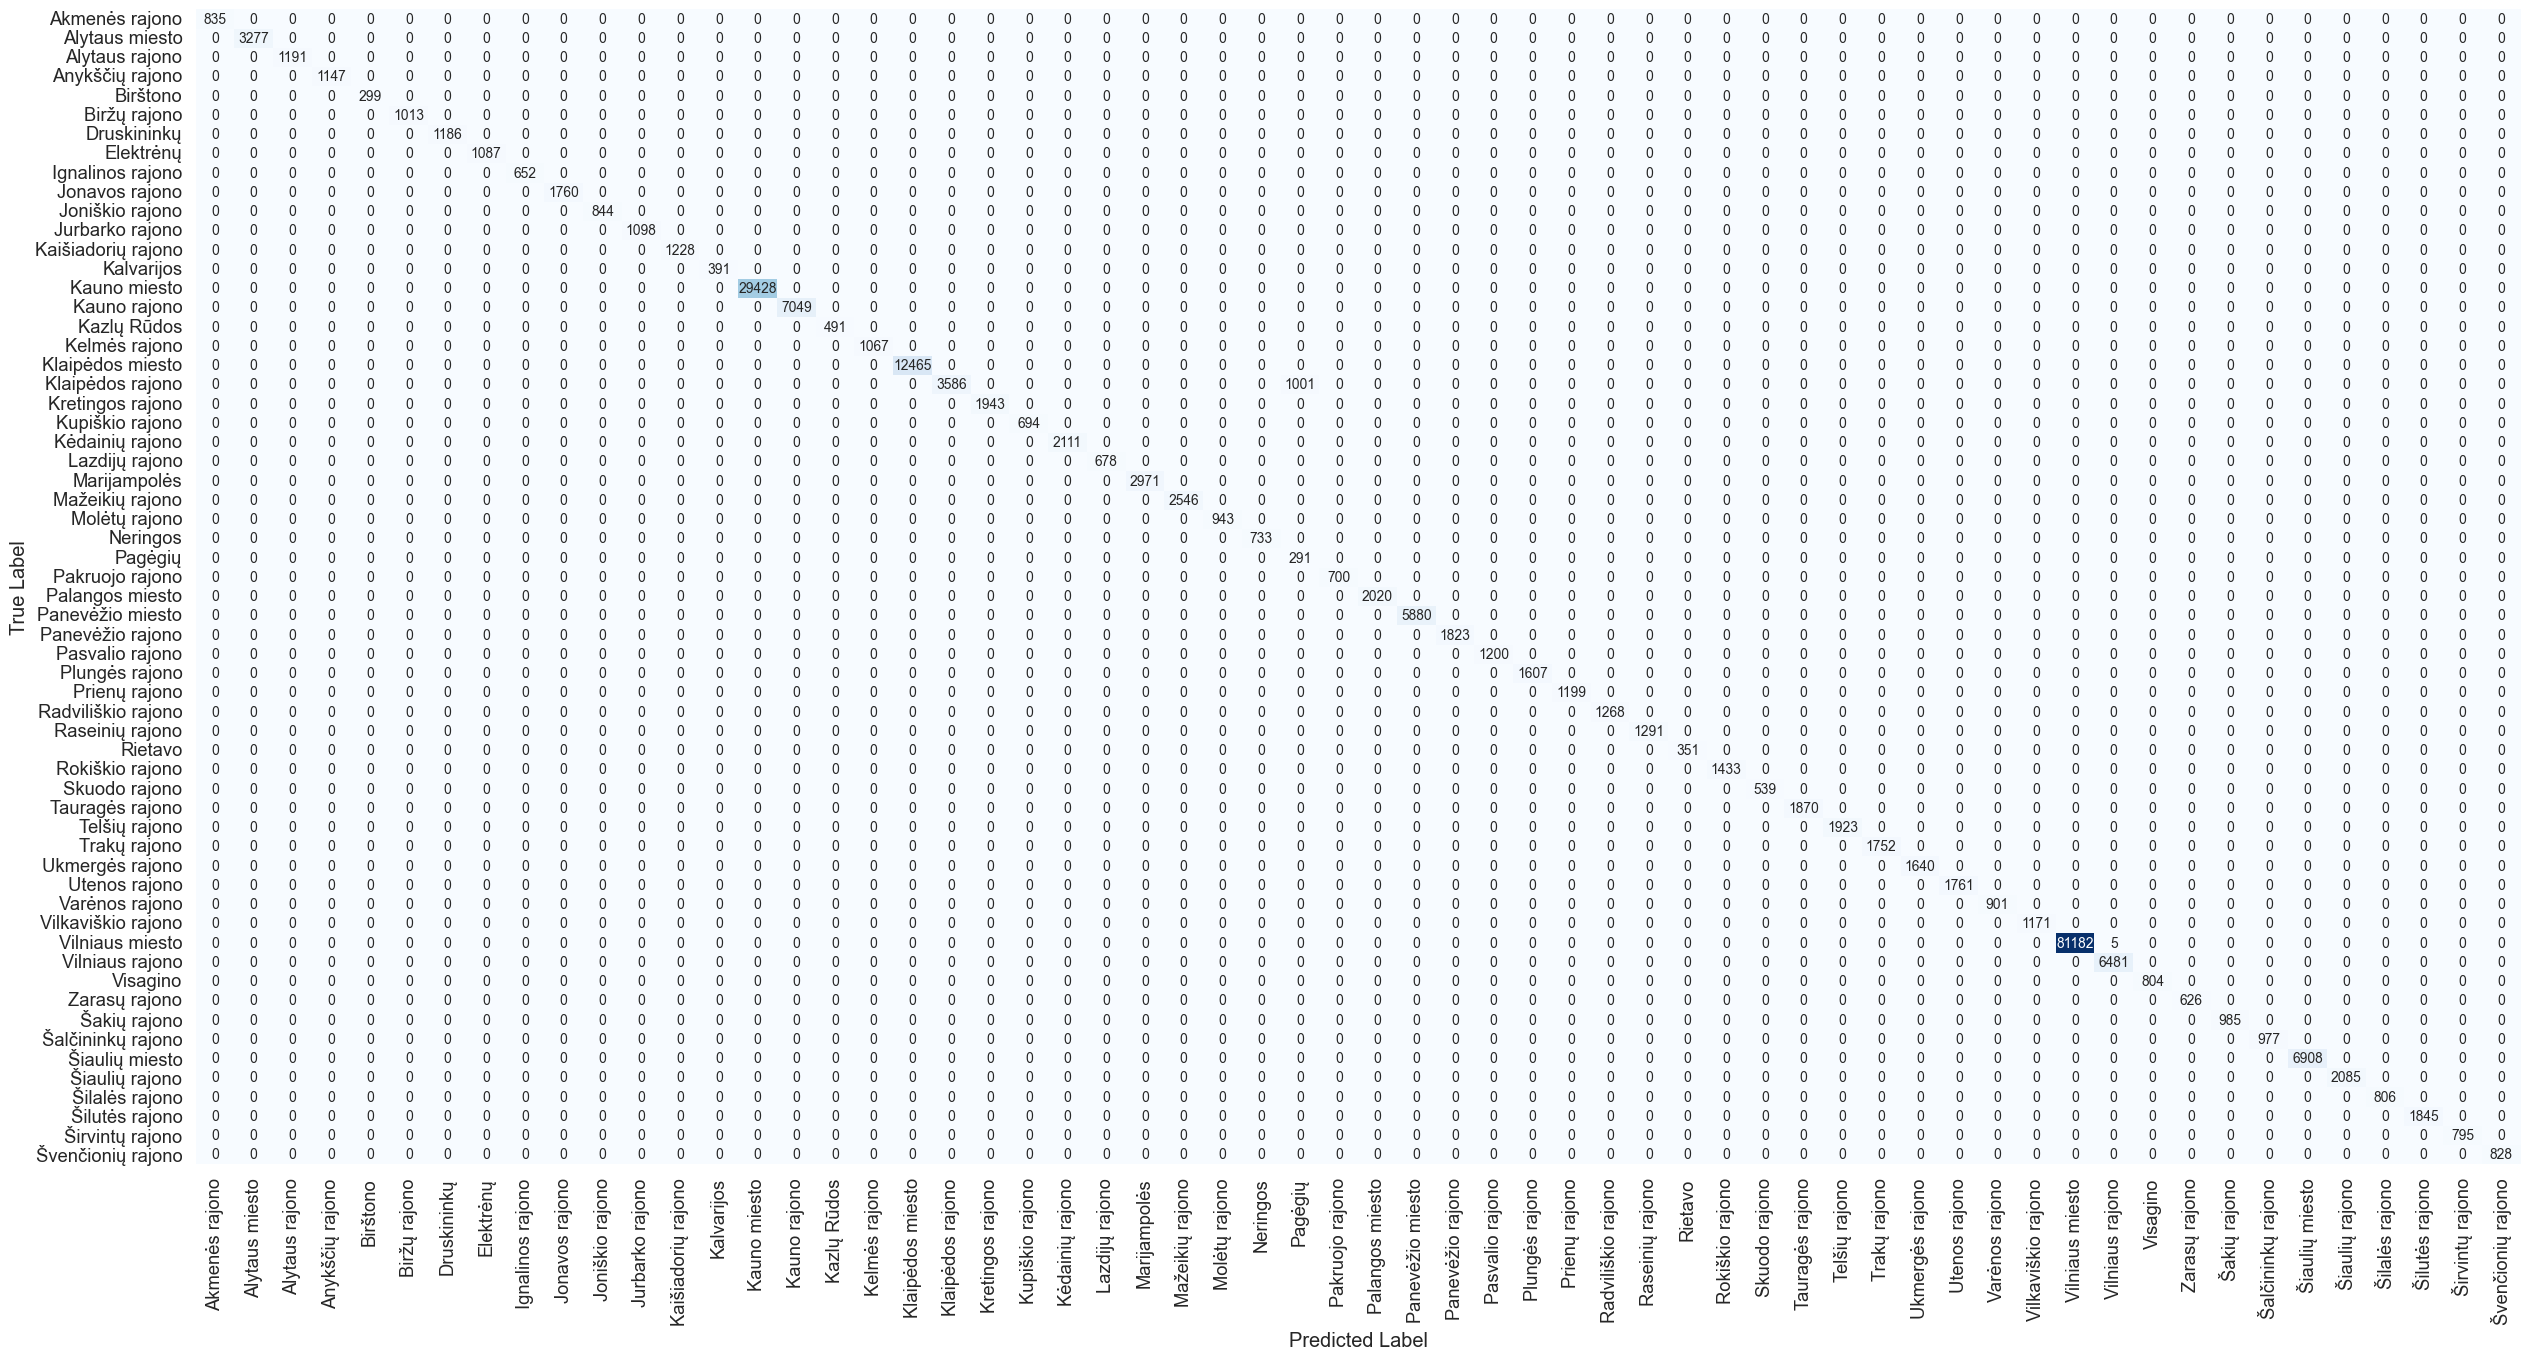

In [202]:
array = confusion_matrix(JAR_adres3_notnull["savivaldybes"], JAR_adres3_notnull["savivaldybes_final"])
labels = sorted(JAR_adres3_notnull['savivaldybes_final'].unique())

df_cm = pd.DataFrame(array, index=labels, columns=labels)

plt.figure(figsize=(30, 15))  
sn.set(font_scale=1.2)  
heatmap = sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt="d", cbar=False, cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [203]:
JAR_adres3_notnull[JAR_adres3_notnull["savivaldybes"] != JAR_adres3_notnull["savivaldybes_final"]]["regex"].value_counts()

regex
Gargždai            1001
Vilniaus r. sav.       5
Name: count, dtype: int64

In [204]:
JAR_adres3_notnull[JAR_adres3_notnull["savivaldybes"] != JAR_adres3_notnull["savivaldybes_final"]]["savivaldybes"].value_counts()

savivaldybes
Klaipėdos rajono    1001
Vilniaus miesto        5
Name: count, dtype: int64

Hmm, įdomi situacija. Regex išskyrė Vilniaus rajoną, fuzzy algorimtas priskyrė, vilniaus rajono savivaldybei, tačiau pagal apjungimus pagal statinių ir patalpų duomenų rinkiniais matome, kad yra Vilniaus miesto. Klaidingi duomenys pirminiuose šaltiniuose? Šiuo atveju nieko nedarau ir palieku kaip yra

In [208]:
JAR_adres3_notnull[JAR_adres3_notnull["savivaldybes"] != JAR_adres3_notnull["savivaldybes_final"]].sort_values(by = ["savivaldybes"]).tail()

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
146431,304856176,"MB ""Trailers rental services""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1E-2, LT-14189",2018-06-13,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2018-06-13,2024-09-01,...,NaN,NaN,189040566.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
140046,304681360,"UAB ""Ryšiai su visuomene""","Vilniaus r. sav., Avižienių sen., Gilužių k., Tarandės g. 90-2, LT-14187",2017-10-03,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2017-10-03,2024-09-01,...,NaN,NaN,181085215.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
92742,302607105,"UAB ""Aeva""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1C-2, LT-14189",2011-03-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2011-03-25,2024-09-01,...,NaN,NaN,188899456.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
5839,123154389,"UAB ""ANTISTRESAS""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1F-2, LT-14189",1995-05-15,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2010-03-09,2024-09-01,...,NaN,NaN,189729551.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
168844,305594652,"MB ""713 Media""","Vilniaus r. sav., Avižienių sen., Gilužių k., Tarandės g. 90-2, LT-14187",2020-07-28,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2020-07-28,2024-09-01,...,NaN,NaN,181085215.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73


In [211]:
JAR_adres3_notnull[JAR_adres3_notnull["savivaldybes"] != JAR_adres3_notnull["savivaldybes_final"]]["savivaldybes_final"].value_counts()

savivaldybes_final
Pagėgių            1001
Vilniaus rajono       5
Name: count, dtype: int64

In [214]:
JAR_adres3

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus,Vilniaus r. sav.,Vilniaus rajono,73
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių,Telšių r. sav.,Telšių rajono,69
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77


Iš atliktos analizės matome, kad pagrindinis nesutapimas yra tas, kad Gargždus priskiria prie Pagėgių, nors turėtų būti Klaipėdos rajonas. Dar paanalizuokime su kokiu tikslumo algoritmas priskiria savivaldybes

In [217]:
JAR_adres3["savivaldybes_final_confidence"].value_counts().to_frame().reset_index().sort_values(by = ["savivaldybes_final_confidence"])

,savivaldybes_final_confidence,count
19,40,1018
26,45,1
1,60,30832
22,62,813
21,64,875
15,66,1876
6,67,10741
9,68,7739
10,69,4489
5,70,11344


Pažiūrime, kaip tie 40, 45, 60, 62 procentai atrodo

- Su 40 tikimybe turime Gargždus. Šią problema mes lengvai išspręsime vėliau
- Su 45 tikimybe turime Biržus. Priskyrė gerai
- Su 60 tikimybe turime Kaunas ir Biržus. Priskyrė gerai
- Su 62 tikimybe turime Trakus ir Šakius. Priskyrė gerai

Toliau tikrinimų nedarau, nes ir taip patikrinau su žinomomis savivaldybėmis

In [219]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 40]["regex"].value_counts()

regex
Gargždai    1018
Name: count, dtype: int64

In [220]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 40]["savivaldybes_final"].value_counts()

savivaldybes_final
Pagėgių    1018
Name: count, dtype: int64

In [221]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 40]["savivaldybes"].value_counts()

savivaldybes
Klaipėdos rajono    1001
Name: count, dtype: int64

In [223]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 40]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
653,110414641,"Lietuvos ir Vokietijos uždaroji akcinė bendrovė ""KLAIPĖDOS DURBĖ""","Gargždai, Statybininkų g. 12, LT-96155",1992-09-02,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1992-09-02,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
657,110425470,"Lietuvos ir Vokietijos uždaroji akcinė bendrovė ""PRŪSA""","Gargždai, Statybininkų g. 5, LT-96155",1992-09-24,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1992-09-24,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
666,110433047,"UAB ""Mida LT""","Gargždai, Gamyklos g. 19, LT-96155",1992-10-13,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2011-06-01,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
716,110507572,"Bendra Lietuvos-Švedijos įmonė uždaroji akcinė bendrovė ""Genčių nafta""","Gargždai, Gamyklos g. 11, LT-96155",1993-06-10,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1993-06-10,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
921,110684448,"UAB ""AKSEL""","Gargždai, Pušų g. 38-17, LT-96145",1995-03-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1995-03-29,2024-09-01,...,NaN,NaN,169565544.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229270,306963497,"UAB ""Vakarų Sportas""","Gargždai, Statybininkų g. 5, LT-96155",2024-07-29,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-07-29,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
229403,306965092,"MB ""Nesveikas grafinis turinys""","Gargždai, Laukų g. 40, LT-96119",2024-07-31,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-07-31,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Klaipėdos rajono,Klaipėdos,Gargždai,Pagėgių,40
229481,306966034,Homenhotel UAB,"Gargždai, Vasario 16-osios g. 40-21, LT-96120",2024-08-02,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-02,2024-09-01,...,NaN,NaN,163512161.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40
229815,306969824,MB Cozy Mess,"Gargždai, Žemaitės g. 64-3, LT-96124",2024-08-13,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-13,2024-09-01,...,NaN,NaN,163222418.0,Klaipėdos rajono,Klaipėdos,Klaipėdos rajono,Klaipėdos rajono,Gargždai,Pagėgių,40


In [224]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 45]["regex"].value_counts()

regex
Biržai 5-8    1
Name: count, dtype: int64

In [226]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 45]["savivaldybes_final"].value_counts()

savivaldybes_final
Biržų rajono    1
Name: count, dtype: int64

In [227]:
JAR_adres3[(JAR_adres3["savivaldybes_final_confidence"] == 45)]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
32256,154894633,"Garažų statybos ir eksploatavimo bendrija ""Energija""",Biržai 5-8,1996-04-02,270,Bendrija,0,Teisinis stat neįregistruotas,1996-04-02,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biržai 5-8,Biržų rajono,45


In [228]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 60]["savivaldybes_final"].value_counts()

savivaldybes_final
Kauno miesto    30224
Biržų rajono      608
Name: count, dtype: int64

In [229]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 60]["savivaldybes"].value_counts()

savivaldybes
Kauno miesto    29428
Biržų rajono      597
Name: count, dtype: int64

In [230]:
JAR_adres3[(JAR_adres3["savivaldybes_final_confidence"] == 60) & (JAR_adres3["regex"] == "Biržai")]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
1231,110871654,"UAB ""NOREINA""","Biržai, Kluono g. 10, LT-41168",2002-01-24,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2002-01-24,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
1291,110893355,"Uždarosios akcinės bendrovės ""LITESKO"" filialas ""Biržų šiluma""","Biržai, Rotušės g. 20A, LT-41137",2003-08-12,311,UAB filialas,0,Teisinis stat neįregistruotas,2003-08-12,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
1631,111654582,"Uždaroji akcinė bendrovė ""SWISCO PRODUCTION""","Biržai, J. Basanavičiaus g. 50, LT-41164",1998-12-16,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1998-12-16,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
1707,111693628,"Uždaroji akcinė bendrovė ""ASRENTA""","Biržai, Plento g. 4B, LT-41128",2000-03-09,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2000-03-09,2024-09-01,...,Biržų rajono,Panevėžio,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
1935,111805415,"UAB ""Butazitas""","Biržai, Vilniaus g. 72, LT-41117",2003-05-19,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2003-05-19,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227607,306838209,MB Minimal A,"Biržai, Vilniaus g. 92-12, LT-41116",2024-06-14,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-06-14,2024-09-01,...,NaN,NaN,166043879.0,Biržų rajono,Panevėžio,Biržų rajono,Biržų rajono,Biržai,Biržų rajono,60
227759,306851950,"UAB ""Savarent""","Biržai, Vytauto g. 39D, LT-41147",2024-06-17,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-06-17,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
228120,306896671,Žmogaus teisių ir demokratijos švietimo institutas,"Biržai, Pasvalio g. 13, LT-41132",2024-07-01,570,Viešoji įstaiga,0,Teisinis stat neįregistruotas,2024-07-01,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60
228213,306910345,"MB ""Gendrasta""","Biržai, Šviesos g. 18, LT-41156",2024-06-28,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-06-28,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Biržų rajono,Panevėžio,Biržai,Biržų rajono,60


In [232]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 62]["savivaldybes_final"].value_counts()

savivaldybes_final
Trakų rajono    443
Šakių rajono    370
Name: count, dtype: int64

In [233]:
JAR_adres3[JAR_adres3["savivaldybes_final_confidence"] == 62]["savivaldybes"].value_counts()

savivaldybes
Trakų rajono    424
Šakių rajono    356
Name: count, dtype: int64

Jei regex stulpelyje prie eilučių matome Gargždus, tai savivaldybės stulpelyje padarome Klaipėdos rajono' prie atitinkamų eilučių. Tokiu atveju turėsime pilnus duomenis be NaN :)

In [234]:
JAR_adres3.loc[JAR_adres3['regex'] == 'Gargždai', 'savivaldybes_final'] = 'Klaipėdos rajono'

In [238]:
JAR_adres3_notnull2 = JAR_adres3[JAR_adres3["savivaldybes"].notnull()]
JAR_adres3_notnull2

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,310,Uždaroji akcinė bendrovė,7,Likviduojamas,2018-03-15,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2009-05-14,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus rajono,Vilniaus,Vilniaus r. sav.,Vilniaus rajono,73
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,162054383.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,1991-04-25,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,189089194.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilnius,Vilniaus miesto,77
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,NaN,NaN,NaN,NaN,NaN,Telšių rajono,Telšių,Telšių r. sav.,Telšių rajono,69
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2024-08-30,2024-09-01,...,Vilniaus miesto,Vilniaus,NaN,NaN,NaN,Vilniaus miesto,Vilniaus,Vilnius,Vilniaus miesto,77


Dar tik primenu, kad turime įdomią situaciją, kai adresų stulpelyje matome Vilniaus rajoną, tačiau prijungus patalpų duomenų rinkinį prie sav_vardas_patalpos_PAT matome Vilniaus miesto. Tokių atvejų turime 5 vienerus. Gali būti klaida patalpų duomenų rinkinyje

In [239]:
JAR_adres3_notnull2[JAR_adres3_notnull2["savivaldybes"] != JAR_adres3_notnull2["savivaldybes_final"]]

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_kodas,form_pavadinimas,stat_kodas,stat_pavadinimas,stat_data_nuo,formavimo_data,...,sav_vardas_patalpos_AOB,apskr_vardas_patalpos_AOB,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT,savivaldybes,apskritys,regex,savivaldybes_final,savivaldybes_final_confidence
5839,123154389,"UAB ""ANTISTRESAS""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1F-2, LT-14189",1995-05-15,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2010-03-09,2024-09-01,...,NaN,NaN,189729551.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
92742,302607105,"UAB ""Aeva""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1C-2, LT-14189",2011-03-25,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2011-03-25,2024-09-01,...,NaN,NaN,188899456.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
140046,304681360,"UAB ""Ryšiai su visuomene""","Vilniaus r. sav., Avižienių sen., Gilužių k., Tarandės g. 90-2, LT-14187",2017-10-03,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,2017-10-03,2024-09-01,...,NaN,NaN,181085215.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
146431,304856176,"MB ""Trailers rental services""","Vilniaus r. sav., Avižienių sen., Bajorų k., Vandenio g. 1E-2, LT-14189",2018-06-13,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2018-06-13,2024-09-01,...,NaN,NaN,189040566.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73
168844,305594652,"MB ""713 Media""","Vilniaus r. sav., Avižienių sen., Gilužių k., Tarandės g. 90-2, LT-14187",2020-07-28,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,2020-07-28,2024-09-01,...,NaN,NaN,181085215.0,Vilniaus miesto,Vilniaus,Vilniaus miesto,Vilniaus miesto,Vilniaus r. sav.,Vilniaus rajono,73


In [242]:
patalpos_PAT[patalpos_PAT["PAT_KODAS"] == 188899456]

,PAT_KODAS,sav_vardas_patalpos_PAT,apskr_vardas_patalpos_PAT
1076694,188899456,Vilniaus miesto,Vilniaus


## Prisidedame apskritis

In [243]:
apskr_sav.sort_values(by = "sav_vardas").head()

,SAV_KODAS,sav_vardas,apskr_vardas
12,32,Akmenės rajono,Šiaulių
0,11,Alytaus miesto,Alytaus
13,33,Alytaus rajono,Alytaus
14,34,Anykščių rajono,Utenos
1,12,Birštono,Kauno


In [244]:
apskr_sav.rename(columns={"apskr_vardas" : "apskritys_final"}, inplace = True)

In [245]:
JAR_adres4 = JAR_adres3.merge(apskr_sav, left_on="savivaldybes_final", right_on="sav_vardas", how = "left")

In [246]:
JAR_adres4.isnull().sum()

ja_kodas                              0
ja_pavadinimas                        0
adresas                               0
ja_reg_data                           0
form_kodas                            0
form_pavadinimas                      0
stat_kodas                            0
stat_pavadinimas                      0
stat_data_nuo                         0
formavimo_data                        0
aob_kodas                         11877
sav_vardas_statiniai             114953
apskr_vardas_statiniai           114953
sav_vardas_patalpos_AOB          203348
apskr_vardas_patalpos_AOB        203348
PAT_KODAS                        127462
sav_vardas_patalpos_PAT          127462
apskr_vardas_patalpos_PAT        127462
savivaldybes                      11877
apskritys                         11877
regex                                 0
savivaldybes_final                    0
savivaldybes_final_confidence         0
SAV_KODAS                             0
sav_vardas                            0


In [247]:
JAR_adres4.columns

Index(['ja_kodas', 'ja_pavadinimas', 'adresas', 'ja_reg_data', 'form_kodas',
       'form_pavadinimas', 'stat_kodas', 'stat_pavadinimas', 'stat_data_nuo',
       'formavimo_data', 'aob_kodas', 'sav_vardas_statiniai',
       'apskr_vardas_statiniai', 'sav_vardas_patalpos_AOB',
       'apskr_vardas_patalpos_AOB', 'PAT_KODAS', 'sav_vardas_patalpos_PAT',
       'apskr_vardas_patalpos_PAT', 'savivaldybes', 'apskritys', 'regex',
       'savivaldybes_final', 'savivaldybes_final_confidence', 'SAV_KODAS',
       'sav_vardas', 'apskritys_final'],
      dtype='object')

Pašaliname neberikalingus stulpelius, kad duomenų rinkinys būtų kuo mažesnis

In [248]:
JAR_adres5 = JAR_adres4[['ja_kodas', 'ja_pavadinimas', 'adresas', 'ja_reg_data', "form_pavadinimas", "stat_pavadinimas", "savivaldybes_final", "apskritys_final"]]
JAR_adres5

,ja_kodas,ja_pavadinimas,adresas,ja_reg_data,form_pavadinimas,stat_pavadinimas,savivaldybes_final,apskritys_final
0,110001436,"UŽDAROJI AKCINĖ BENDROVĖ ""LAMARING""","Vilnius, Kirtimų g. 57B, LT-02244",1991-04-02,Uždaroji akcinė bendrovė,Likviduojamas,Vilniaus miesto,Vilniaus
1,110003978,"Uždaroji akcinė bendrovė ""Lietkompexim""","Vilnius, S. Stanevičiaus g. 95, LT-07114",1991-04-25,Uždaroji akcinė bendrovė,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus
2,110004884,"Uždaroji akcinė bendrovė ""VILLON""","Vilniaus r. sav., Avižienių sen., Ežeraičių k., Ežeraičių g. 2, LT-14200",1991-04-25,Uždaroji akcinė bendrovė,Teisinis stat neįregistruotas,Vilniaus rajono,Vilniaus
3,110005648,"UAB ""Informacinės paslaugos""","Vilnius, Trakų g. 8-5, LT-01132",1991-04-25,Uždaroji akcinė bendrovė,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus
4,110006892,"Uždaroji akcinė bendrovė ""Londvil""","Vilnius, Laisvės pr. 85A, LT-06123",1991-04-25,Uždaroji akcinė bendrovė,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus
...,...,...,...,...,...,...,...,...
230533,306982031,MB NovAgro,"Vilnius, Eduardo Andrė g. 14-5, LT-02232",2024-08-30,Mažoji bendrija,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus
230534,306982049,MB Kibučiai,"Telšių r. sav., Varniai, Senojo Malūno g. 5, LT-88320",2024-08-30,Mažoji bendrija,Teisinis stat neįregistruotas,Telšių rajono,Telšių
230535,306982056,"Inter Code, UAB","Vilnius, Mindaugo g. 23A, LT-03231",2024-08-30,Uždaroji akcinė bendrovė,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus
230536,306982330,"MB ""Plasma Projects""","Vilnius, V. Nagevičiaus g. 3, LT-08237",2024-08-30,Mažoji bendrija,Teisinis stat neįregistruotas,Vilniaus miesto,Vilniaus


In [249]:
JAR_adres5.isnull().sum()

ja_kodas              0
ja_pavadinimas        0
adresas               0
ja_reg_data           0
form_pavadinimas      0
stat_pavadinimas      0
savivaldybes_final    0
apskritys_final       0
dtype: int64

In [250]:
JAR_adres5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230538 entries, 0 to 230537
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ja_kodas            230538 non-null  int64         
 1   ja_pavadinimas      230538 non-null  object        
 2   adresas             230538 non-null  object        
 3   ja_reg_data         230538 non-null  datetime64[ns]
 4   form_pavadinimas    230538 non-null  object        
 5   stat_pavadinimas    230538 non-null  object        
 6   savivaldybes_final  230538 non-null  object        
 7   apskritys_final     230538 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 14.1+ MB


In [251]:
JAR_adres5.to_excel("JAR_dataset.xlsx", index = False)